# Tensorflow Basic Operations

This notebook explains the basic operations provided by tensorflow. Some of them could be achieved by using just normal python using numpy. Since tensorflow use symbolic graphs to decribe variables (tensors), models and operations, it is better to use custom tensorflow operators since they are optimized during its execution (VPU, GPU, etc..)

TensorFlow, as the name indicates, is a framework to define and run computations involving **tensors**. A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes.

## Adds two matrices.

This example compute the addition of two matrices using tensorflow operators.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

1. First, we create a matrix 2x3 with **ones**

In [1]:
import tensorflow as tf
# Enable TensorFlow's eager execution for imperative programming environment that evaluates operations immediately
# https://www.tensorflow.org/guide/eager
# NOTE: Restart the Juypter Kernel, since it must be set at startup
#tf.enable_eager_execution()

# Create the one matrix (2x3) using the official documentation form tensorflow 
# https://www.tensorflow.org/api_docs/python/tf/ones
#   tf.ones(shape,dtype=tf.float32,name=None)
input_matrix = tf.ones((2,3), name='input_matrix')

# Since the model is not compiled, we cannot see its content yet. 
# These variables are called tensors until it gets evaluated.
# Enable eager execution to get the contents without creating a session 
print(input_matrix)

# Also, we cannot evaluate it yet, since we have not created the session yet
# This does not work with eager execution, since it is already evaluated immediately
#print(ones_matrix.eval()) # ERROR: No default session is registered.

# Instead create a new session to get previous content evaluated
with tf.Session():
   print(input_matrix.eval())

Tensor("input_matrix:0", shape=(2, 3), dtype=float32)
[[1. 1. 1.]
 [1. 1. 1.]]


2. Creates a new matrix 2x3. 

  - First, create a linear range from 1 to 6 (inclusive)

In [2]:
# Create the range to be used to build the matrix later
# https://www.tensorflow.org/api_docs/python/tf/range
#    tf.range(limit, delta=1, dtype=None, name='range')
#    tf.range(start, limit, delta=1, dtype=None, name='range')
number_range = tf.range(1,7,dtype=tf.float32, name='number_range')

print(number_range)

with tf.Session():
   print(number_range.eval())

Tensor("number_range:0", shape=(6,), dtype=float32)
[1. 2. 3. 4. 5. 6.]


  - Next, we create a matrix by reshaping previous range with the proper shape 2x3

In [3]:
# Reshape previous range to the new shape 2x3
# https://www.tensorflow.org/api_docs/python/tf/reshape
# tf.reshape(tensor, shape, name=None)
range_matrix = tf.reshape(number_range, (2,3), name='matrix_range')

print(range_matrix)

with tf.Session():
   print(range_matrix.eval())

Tensor("matrix_range:0", shape=(2, 3), dtype=float32)
[[1. 2. 3.]
 [4. 5. 6.]]


3. Describe the sum operation using previous *tensors*

In [4]:
# Create the operation. In some cases, we can just use standard python to describe opeations: +, -, *, etc..
# sum_operation = ones_matrix + range_matrix
# For best practices it is better to use custom tensor flow oprations . i.e Add a name to the operation for the graph.
# https://www.tensorflow.org/api_docs/python/tf/math/add
#   tf.add(x, y, name=None)
sum_operation = tf.add(input_matrix, range_matrix, name='sum_operation')
                       
print(sum_operation)

with tf.Session():
   print(sum_operation.eval())                   

Tensor("sum_operation:0", shape=(2, 3), dtype=float32)
[[2. 3. 4.]
 [5. 6. 7.]]


## Placeholders

In this section we add an input (placeholder) so it can be loaded dinamically (dataset, csv, image, etc..)

In [5]:
# Create a placeholder (tensor) to store the matriz to be sum instead the previous one matrix
# https://www.tensorflow.org/api_docs/python/tf/placeholder
# tf.placeholder(dtype, shape=None, name=None)
input_matrix = tf.placeholder(tf.float32, (2, 3), name='input_matrix')

print(input_matrix)

Tensor("input_matrix_1:0", shape=(2, 3), dtype=float32)


In this case we need to pass throurh the run operation the inputs to the previous operation


In [6]:
import numpy as np

# Create the sesssion
# https://www.tensorflow.org/api_docs/python/tf/Session

with tf.Session() as sess:
    # Create the matrix using numpy or load it from any other source  
    ones_matrix = np.ones(shape=(2,3))
    # Run a custom operation from a session (instad using eval())
    # run(fetches, feed_dict=None, options=None, run_metadata=None)
    print(sess.run(sum_operation, feed_dict={input_matrix: ones_matrix}))


[[2. 3. 4.]
 [5. 6. 7.]]


# Graphic Plots

Create graphic plots usint matplotlib

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[array([-0.52857376]), array([0.91655386]), array([2.87518777]), array([3.6859527]), array([3.12925427]), array([4.71061506]), array([5.87469902]), array([7.77416194]), array([6.81118444]), array([10.77419759]), array([11.47331465]), array([11.06695572]), array([10.3118532]), array([11.65310742]), array([13.70601349]), array([15.49099138]), array([15.32320158]), array([16.16714823]), array([17.15399919]), array([22.10025019])]


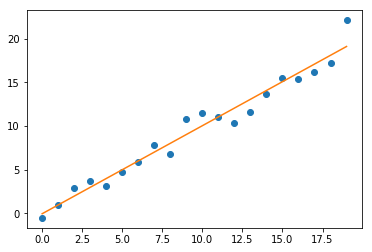

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

# Create a range unsing numpy (x axis)
x = np.arange(20)
print(x)
# Use list comprehension to generate random values using previous values (y axis)
y = [number + np.random.randn(1) for number in x]
print(y)
# Get the vector of coefficients p that minimises the squared error.
# y = ax + b
a, b = np.polyfit(x, y, 1)
# Generate the plot
# - Draw line using previous coeficients (a, b)
# - Draw the points using data values (x, y)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')